In [2]:
import pandas as pd

file1 = pd.read_excel('data/附件.xlsx',sheet_name='表单1')
file2 = pd.read_excel('data/附件.xlsx',sheet_name='表单2')
file3 = pd.read_excel('data/附件.xlsx',sheet_name='表单3')

# 1 问题二

In [3]:
from tqdm import tqdm
import re
tqdm.pandas()

def clear_id(s):
    ss = str(s)
    n = int(re.findall(r"\d+",ss)[0])
    return n
file2['id'] = file2['文物采样点'].progress_apply(clear_id)
file1['id'] = file1['文物编号'].progress_apply(clear_id)

/Applications/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 58/58 [00:00<00:00, 33642.60it/s]


In [4]:
cols = ['纹饰', '类型', '颜色', '表面风化', '二氧化硅(SiO2)',
       '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)',
       '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
cols1 = ['二氧化硅(SiO2)',
       '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)',
       '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
cols2 = ['纹饰', '类型', '颜色', '表面风化',]

In [5]:
file_data = pd.merge(file1,file2,on='id')
Gao_data = file_data[file_data['类型']=='高钾'][cols]
Qian_data = file_data[file_data['类型']=='铅钡'][cols]

In [6]:
Gao_data.isnull().any()

纹饰             False
类型             False
颜色             False
表面风化           False
二氧化硅(SiO2)     False
氧化钠(Na2O)       True
氧化钾(K2O)        True
氧化钙(CaO)        True
氧化镁(MgO)        True
氧化铝(Al2O3)      True
氧化铁(Fe2O3)      True
氧化铜(CuO)        True
氧化铅(PbO)        True
氧化钡(BaO)        True
五氧化二磷(P2O5)     True
氧化锶(SrO)        True
氧化锡(SnO2)       True
二氧化硫(SO2)       True
dtype: bool

In [7]:
Qian_data.isnull().any()

纹饰             False
类型             False
颜色              True
表面风化           False
二氧化硅(SiO2)     False
氧化钠(Na2O)       True
氧化钾(K2O)        True
氧化钙(CaO)        True
氧化镁(MgO)        True
氧化铝(Al2O3)     False
氧化铁(Fe2O3)      True
氧化铜(CuO)        True
氧化铅(PbO)       False
氧化钡(BaO)        True
五氧化二磷(P2O5)     True
氧化锶(SrO)        True
氧化锡(SnO2)       True
二氧化硫(SO2)       True
dtype: bool

In [8]:
Qian_data['颜色'].value_counts()

浅蓝    20
紫      6
深绿     6
黑      4
浅绿     3
蓝绿     3
深蓝     2
绿      1
Name: 颜色, dtype: int64

In [9]:
Qian_data['颜色'] = Qian_data['颜色'].fillna('浅蓝')
Qian_data = Qian_data.fillna(0)
Gao_data = Gao_data.fillna(0)

In [10]:
Gao_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   纹饰           20 non-null     object 
 1   类型           20 non-null     object 
 2   颜色           20 non-null     object 
 3   表面风化         20 non-null     object 
 4   二氧化硅(SiO2)   20 non-null     float64
 5   氧化钠(Na2O)    20 non-null     float64
 6   氧化钾(K2O)     20 non-null     float64
 7   氧化钙(CaO)     20 non-null     float64
 8   氧化镁(MgO)     20 non-null     float64
 9   氧化铝(Al2O3)   20 non-null     float64
 10  氧化铁(Fe2O3)   20 non-null     float64
 11  氧化铜(CuO)     20 non-null     float64
 12  氧化铅(PbO)     20 non-null     float64
 13  氧化钡(BaO)     20 non-null     float64
 14  五氧化二磷(P2O5)  20 non-null     float64
 15  氧化锶(SrO)     20 non-null     float64
 16  氧化锡(SnO2)    20 non-null     float64
 17  二氧化硫(SO2)    20 non-null     float64
dtypes: float64(14), object(4)
memory usage: 3.0+ KB


In [11]:
Gao_data

,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,C,高钾,蓝绿,无风化,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
2,A,高钾,蓝绿,无风化,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,A,高钾,蓝绿,无风化,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,A,高钾,蓝绿,无风化,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
5,A,高钾,蓝绿,无风化,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
6,A,高钾,蓝绿,无风化,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
7,A,高钾,蓝绿,无风化,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
8,B,高钾,蓝绿,风化,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
11,B,高钾,蓝绿,风化,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
12,B,高钾,蓝绿,风化,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
Gao_data[cols1].sum(axis=1)

0      97.61
2     100.00
3      98.88
4      96.06
5      96.51
6      98.92
7      98.84
8      99.70
11     99.77
12     99.81
14     99.57
15     98.14
16     99.00
17     79.47
18     98.41
19     71.89
20     97.25
23     98.52
24    100.00
30     98.81
dtype: float64

In [13]:
# 存在两个无效数据
(Gao_data[cols1].sum(axis=1)<85).value_counts()


False    18
True      2
dtype: int64

In [14]:
# 删除两个两个无效数据
Gao_data = Gao_data.drop([17,19])

In [15]:
from sklearn.preprocessing import LabelEncoder

Gao_train = pd.DataFrame() # 用于存放编码后的训练数据
label = LabelEncoder() # 标号编码器
X= Gao_data
for c in X.columns: # 对每个特征列
    if X[c].dtype=='object': # 如果是字符串形式的(字符串读到pandas里dtype是object)
        Gao_train[c] = label.fit_transform(X[c]) # 将整个这一列进行标号编码，写到新的dataframe里
    else: # 其它类型的特征(数值,布尔)保持原样写入
        Gao_train[c] = list(X[c])

Qian_train = pd.DataFrame() # 用于存放编码后的训练数据
label = LabelEncoder() # 标号编码器
X= Qian_data
for c in X.columns: # 对每个特征列
    if X[c].dtype=='object': # 如果是字符串形式的(字符串读到pandas里dtype是object)
        Qian_train[c] = label.fit_transform(X[c]) # 将整个这一列进行标号编码，写到新的dataframe里
    else: # 其它类型的特征(数值,布尔)保持原样写入
        Qian_train[c] = list(X[c])


In [16]:
Qian_data

,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,A,铅钡,浅蓝,风化,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
9,C,铅钡,紫,风化,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
10,C,铅钡,紫,风化,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03
13,C,铅钡,浅蓝,风化,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
21,A,铅钡,浅蓝,风化,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
22,A,铅钡,浅蓝,无风化,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
25,A,铅钡,蓝绿,风化,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,11.86,0.00,0.33,0.00,0.00
26,C,铅钡,紫,无风化,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
27,C,铅钡,浅蓝,风化,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,6.65,0.19,0.20,0.00,0.00
28,C,铅钡,紫,风化,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.00,1.96


In [17]:
Gao_train


,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,2,0,3,0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,0,0,3,0,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
2,0,0,3,0,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
3,0,0,3,0,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
4,0,0,3,0,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
5,0,0,3,0,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
6,0,0,3,0,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
7,1,0,3,1,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
8,1,0,3,1,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
9,1,0,3,1,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


## 2.2 层次聚类

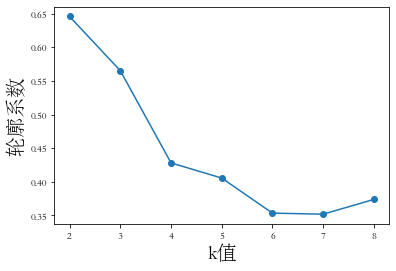

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STSong']
data = np.array(Gao_train)

Scores = []  # 存放轮廓系数
SSE = []  # 存放每次结果的误差平方和
for k in range(2, 9):
    estimator = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
    estimator.fit(data)
    Scores.append(silhouette_score(
        np.array(data), estimator.labels_, metric='euclidean'))
X = range(2,9)
plt.xlabel('k值',fontsize=20)
plt.ylabel('轮廓系数',fontsize=20)
plt.plot(X, Scores, 'o-')
plt.savefig('img2/AGG聚类——铅钡数据手肘法.png',dpi=300)
plt.show()

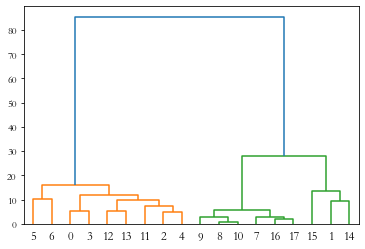

In [19]:
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
k = 6
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =Gao_train
model.fit(data) #训练模型
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
plt.savefig('img2/高钾分为6类-AGG层次聚类.png',dpi=300)
plt.show()


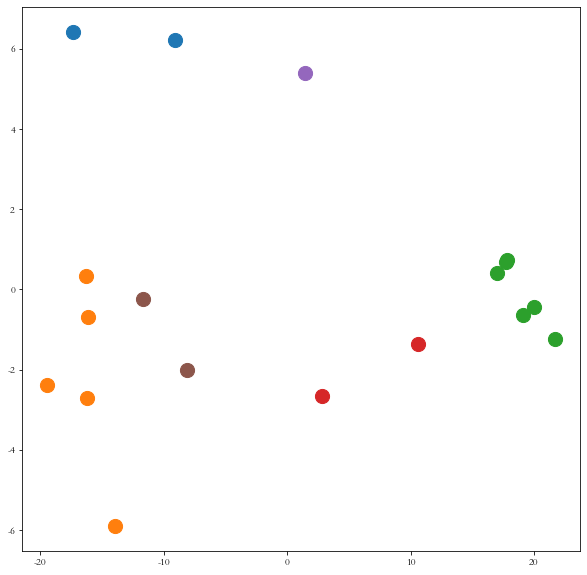

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df1 = Gao_train
data1 = np.array(df1)

clf1 = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(data1)
score1 = silhouette_score(data1, pred1)

pca = PCA(n_components=2)  # 输出两维
newData1 = pca.fit_transform(data1)  # 载入N维

x1, y1 = [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []
x5, y5= [], []
x6, y6= [], []
for index, value in enumerate(pred1):
    if value == 0:
        x1.append(newData1[index][0])
        y1.append(newData1[index][1])
    elif value == 1:
        x2.append(newData1[index][0])
        y2.append(newData1[index][1])
    elif value == 2:
        x3.append(newData1[index][0])
        y3.append(newData1[index][1])
    elif value == 3:
        x4.append(newData1[index][0])
        y4.append(newData1[index][1])
    elif value == 4:
        x5.append(newData1[index][0])
        y5.append(newData1[index][1])
    elif value == 5:
        x6.append(newData1[index][0])
        y6.append(newData1[index][1])
# plt.subplot(132)
plt.figure(figsize=(10, 10))

# #定义坐标轴
k = 200
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.scatter(x5, y5,s=k)
plt.scatter(x6, y6,s=k)
plt.savefig('./img2/高钾分为6类的数据分布二维可视化.png',dpi=300)
plt.show()



In [24]:
clf1.fit_predict(data1)

array([1, 0, 0, 0, 1, 0, 4, 0, 4, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 3, 3, 1, 4, 4, 3, 3, 2, 2, 4, 4, 2, 1, 4, 1, 4, 1, 3, 1, 2, 3,
       3, 4, 1, 1, 1])

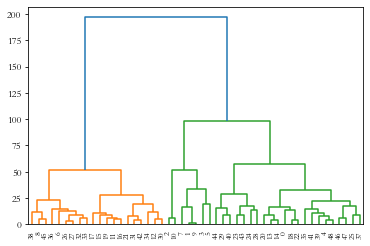

In [21]:
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
k = 5
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =Qian_train
model.fit(data) #训练模型
#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别

#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
plt.savefig('img2/铅钡分为5类-AGG层次聚类.png',dpi=300)
plt.show()

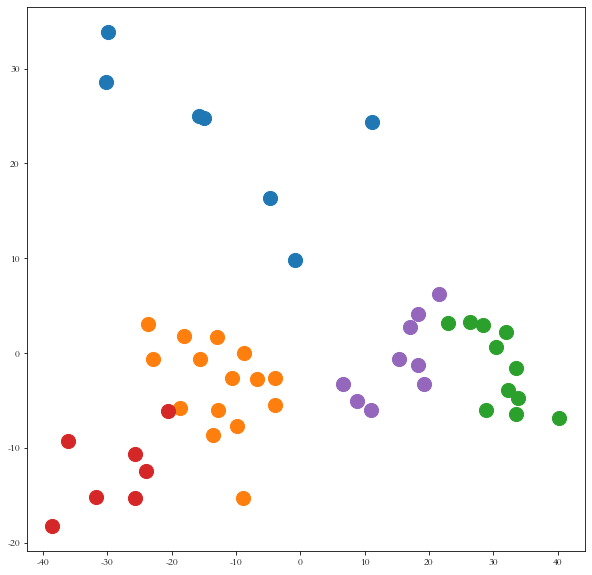

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df1 = Qian_train
data1 = np.array(df1)

clf1 = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(data1)
score1 = silhouette_score(data1, pred1)

pca = PCA(n_components=2)  # 输出两维
newData1 = pca.fit_transform(data1)  # 载入N维

x1, y1 = [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []
x5, y5= [], []
x6, y6= [], []
for index, value in enumerate(pred1):
    if value == 0:
        x1.append(newData1[index][0])
        y1.append(newData1[index][1])
    elif value == 1:
        x2.append(newData1[index][0])
        y2.append(newData1[index][1])
    elif value == 2:
        x3.append(newData1[index][0])
        y3.append(newData1[index][1])
    elif value == 3:
        x4.append(newData1[index][0])
        y4.append(newData1[index][1])
    elif value == 4:
        x5.append(newData1[index][0])
        y5.append(newData1[index][1])
# plt.subplot(132)
plt.figure(figsize=(10, 10))

# #定义坐标轴
k = 200
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.scatter(x5, y5,s=k)
plt.savefig('./img2/铅钡分为6类的数据分布二维可视化.png',dpi=300)
plt.show()



In [23]:
clf1.fit_predict(data1)

array([1, 0, 0, 0, 1, 0, 4, 0, 4, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 3, 3, 1, 4, 4, 3, 3, 2, 2, 4, 4, 2, 1, 4, 1, 4, 1, 3, 1, 2, 3,
       3, 4, 1, 1, 1])